In [1]:
import pandas as pd

In [2]:
# read_csv() 함수로 DataFrame 형태로 데이터 불러오기
file_path = './data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [21]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
print(chipo.shape)
print("-----------------------------------------------")
print(chipo.info())

(4622, 5)
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 4622개 행, 5개 열
- object는 스트링 데이터

In [5]:
print(chipo.columns)
print("-----------------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-----------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [6]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
chipo['order_id'] = chipo['order_id'].astype(int) # order_id의 형태가 int로 되어 있으나 숫자로써의 의미를 가지지 않기 때문에 str로  변환해 준다.
print(chipo.describe())  # chipoDataFrame에서 수치형 피쳐들의 요약 통계량을 확인

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [8]:
# 범주형 데이터 출력 -> unique 사용
print(len(chipo['order_id'].unique()))  # order_id의 개수 출력
print(len(chipo['item_name'].unique()))  # item_name의 개수 출력

1834
50


In [9]:
len(chipo['item_name'].value_counts())

50

In [10]:
chipo['item_name'].value_counts()[:10]   # 가장 많이 팔린 10개 아이템

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [11]:
# 가장 많이 주문한 item:top10 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [12]:
# item 당 주문 개수 출력
order_count = chipo.groupby('item_name')['order_id'].count() # groupby: 그룹을 묶어서 연산을 도와줌
order_count[:10] # item 당 주문 개수 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [13]:
# item 당 주문 총량 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] 

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

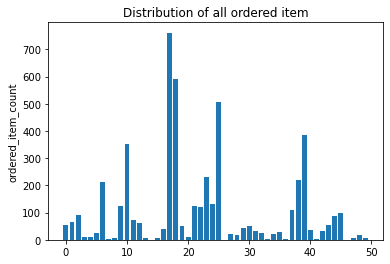

In [14]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')
plt.show()

In [15]:
item_quantity.values

array([ 55,  66,  91,  12,  10,  25, 211,   4,   6, 126, 351,  71,  60,
         8,   1,   6,  40, 761, 591,  50,   9, 123, 120, 230, 130, 506,
         1,  23,  18,  45,  50,  33,  25,   2,  20,  29,   2, 110, 221,
       386,  36,   4,  31,  56,  87,  97,   1,   6,  18,   8], dtype=int64)

### price 데이터 전처리 하기

- 현재 chipo라는 데이터의 'item_price'열의 값은 $2.39, $3.39, $16.98 의 형태로 데이터값 존재. 
- 4622개의 값을 지닌 item_price의 평균, 표준편차 등의 숫자 계산 값을 구하려면 데이터 앞에 붙어 있는 $를 제거해야 한다.

In [22]:
chipo['item_price']   # item_price 컬럼 형태 확인

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

#### $를 제거하는 방법: apply함수로 데이터 전처리

- 'item_price'의 값 = x 변수
- .apply(lambda x: float(x[1:]))는 저 3.49달러와 x변수를 1번째 자리부터 갖고 올 것이고 이를 float화 시킨다는 것.
- 즉 달러기호는 0번째 자리고, 3은 1번째 자리이므로 1번째 자리부터 끝까지인 3.49를 갖고 온다는 것.
- 만약 18.99달러 값이 있었다면 이는 18.99로 가져와 지는 것

- 만약 chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[2:])) 로 설정하였다면 18.99달러 값이 2번째 숫자부터 가져오게 되고, 8.99이라는 숫자 형태로 변형된다.

In [17]:
# apply(a) -> a라는 함수를 적용하겠다.
# lambda -> 

In [20]:
#item_price_col = chipo['item_price']
#item_price_col
#item_price_list = item_price_col.values.tolist()

In [18]:
# column 단위 데이터에 amply 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [19]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


### 탐색적 분석(EDA) 
- 주문당 평균 계산 금액 출력하기
- 한 주문에 10달러 이상 쓴 주문의 id 출력
- 각 아잍템의 각겨 구하기
- 가장 비싼 주문에서 item 이 몇 개 팔렸는지 구하기
- veggie salad bowl이 몇 번 주문되었는지 구하기
- chicken bowl을 2개 이상 주문한 주문횟수 구하기

In [57]:
# 한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [59]:
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group.head(20)

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
6,2,17.50
7,2,15.70
8,2,10.88
9,3,10.67


In [60]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [61]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

In [23]:
# 한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >=10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [25]:
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


In [27]:
# 각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()   # 최소값, 토핑이 들어가지 않은 가격을 찾는다.
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]    # item_price를 기준으로 정렬(내림차순으로 상위 10개 출력)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [28]:
# veggie salad bowl이 몇 번 주문되었는지 구하기
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']   #  chipo['item_name'] == 'Veggie Salad Bowl'] -> 조건: 컬럼 중 해당 데이터값만 담겠다
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])  # 한 주문 내에서 중복 집계된 item_name값 drop

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
